# [Dimensionality Reduction using an Autoencoder in Python](https://www.coursera.org/learn/dimensionality-reduction-autoencoder-python/)

Welcome to this project. We will introduce the theory behind an autoencoder (AE), its uses, and its advantages over PCA, a common dimensionality reduction technique.

## Some Prerequisites
- Basic-to-intermediate level understanding of Python
- Basic theory of neural networks is beneficial, but not required

## Project Outline
[**Task 1**](#task1): Package Importing and Introduction to Project

[**Task 2**](#task2): Dataset Creation and Preprocessing

[**Task 3**](#task3): Create a Baseline Model with PCA

[**Task 4**](#task4): Autoencoder Introduction and Training

[**Task 5**](#task5): Reducing Dimensionality with AE

<a id='task1'></a>
# Task 1: Importing and Introduction

In [1]:
import matplotlib

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

plt.style.use("ggplot")

import numpy as np

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, silhouette_score

In [3]:
cols = [
    "#1FC17B",
    "#78FECF",
    "#555B6E",
    "#CC998D",
    "#429EA6",
    "#153B50",
    "#8367C7",
    "#EE6352",
    "#C287E8",
    "#F0A6CA",
    "#521945",
    "#361F27",
    "#828489",
    "#9AD2CB",
    "#EBD494",
    "#53599A",
    "#80DED9",
    "#EF2D56",
    "#446DF6",
    "#AF929D",
]

<a id='task2'></a>
# Task 2: Dataset Creation and Preprocessing

In [4]:
X, y = make_blobs(n_features=50, centers=20, n_samples=20_000, cluster_std=0.2, center_box=[-1, 1], random_state=17)

In [5]:
X[0]

array([-0.24491985,  0.08099673, -0.36631058, -0.30356551,  0.4029225 ,
        0.65687067,  0.92734294,  0.15492068, -1.10501981,  1.2015462 ,
        0.09578114, -0.75648951, -0.03483697, -0.59523737,  0.02576486,
        0.53523807,  0.08089194, -0.26480015, -0.71277422,  0.07793643,
        0.10326661, -0.92311803, -0.18569531, -0.5761846 , -0.78765359,
       -0.83055169,  0.04446853, -0.26118528,  0.8337965 , -0.59227263,
        0.68834042,  0.17701281,  0.2732509 , -0.00538731,  0.92922794,
        0.62743183,  0.85424358,  0.80721711, -1.14219787,  0.28178435,
        0.55215801,  0.38500603,  0.19163107,  0.55960783,  0.72073584,
       -1.14520866,  1.09184982, -1.04337987,  1.24350139, -0.63786661])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=17)

Why do we scale our dataset after splitting it into training and validation/test sets?

During model design, we must hold out our validation/test data for all steps to preserve model integrity.

We do not want to bias our model's training by using any information gathered from our validation/test datasets.

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<a id='task3'></a>
# Task 3: Baseline Model

In [7]:
pca = PCA(n_components=2)
pca.fit(X_train)

y_pred = pca.transform(X_test)

In [8]:
y_pred.shape

(2000, 2)

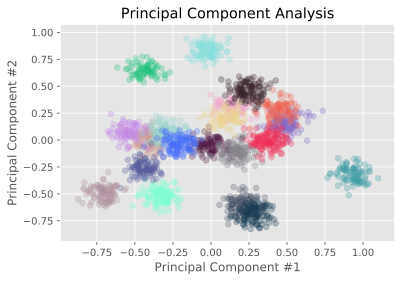

In [9]:
unique_labels = np.unique(y_test)

for index, unique_label in enumerate(unique_labels):
    X_data = y_pred[y_test == unique_label]

    plt.scatter(X_data[:, 0], X_data[:, 1], alpha=0.3, c=cols[index])

plt.xlabel("Principal Component #1")
plt.ylabel("Principal Component #2")
plt.title("Principal Component Analysis");

<a id='task4'></a>
# Task 4: Autoencoder Theory and Training

In [10]:
autoencoder = MLPRegressor(alpha=1e-15, hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50), random_state=1, max_iter=20_000)

autoencoder.fit(X_train, X_train)

MLPRegressor(activation='relu', alpha=1e-15, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50),
             learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
             max_iter=20000, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
             solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

<a id='task5'></a>
# Task 5: Reducing Dimensionality with Encoder

In [12]:
W = autoencoder.coefs_
b = autoencoder.intercepts_

In [13]:
for w in W:
    print(w.shape)

(50, 50)
(50, 100)
(100, 50)
(50, 2)
(2, 50)
(50, 100)
(100, 50)
(50, 50)


In [14]:
encoder_weights = W[:4]
encoder_biases = b[:4]

In [15]:
def encode(encoder_weights, encoder_biases, data):
    data = data.copy()
    for index, (w, b) in enumerate(zip(encoder_weights, encoder_biases)):
        if index + 1 == len(encoder_weights):
            data = data @ w + b
        else:
            data = np.maximum(0, data @ w + b)  # ReLU
    return data


X_test_encoded = encode(encoder_weights, encoder_biases, X_test)

In [16]:
X_test_encoded.shape

(2000, 2)

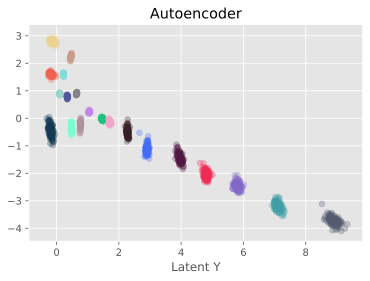

In [17]:
unique_labels = np.unique(y_test)

for index, unique_label in enumerate(unique_labels):
    latent_space = X_test_encoded[y_test == unique_label]

    plt.scatter(latent_space[:, 0], latent_space[:, 1], alpha=0.3, c=cols[index])

plt.xlabel("Latent X")
plt.xlabel("Latent Y")
plt.title("Autoencoder");

In [18]:
silhouette_score(X_test, y_test)

0.6100948647899368

In [19]:
silhouette_score(y_pred, y_test)

0.3678788986884713

In [20]:
silhouette_score(X_test_encoded, y_test)

0.8074659601928073